## 实验：感知机基础运算

### 实验概要

感知机（**perceptron**）是神经网络的组成成分，也被称为神经元。感知机是由美国学者 Frank Rosenblatt 在 1957 年提出来的。因为感知机也是作为神经网络（深度学习）的起源的算法。因此，学习感知机的构造也就是学习通向神经网络和深度学习的一种重要思想。

感知机接收多个输入信号，输出一个信号。这里所说的信号，可以想象成电流或河流那样具备流动性的东西。像电流流过导线，向前方输送电子一样，感知机的信号也会形成流，向前方输送信息。但是，和实际的电流不同的是，感知机的信号只有 `传递信号` / `不传递信号` （**`1`** / **`0`**）两种取值。

#### 感知器定义

下面是一个感知机，如图：

![](img/1_02.png)

一个感知机由图下部分组成：

1. **输入权值：** 一个感知机可以接收多个输入 ${(x_1,x_2,...,x_n)}$，每个输入上有一个 **权重值** $w_i$ 和一个偏置项 **b**
2. **激活函数：** 感知机的激活函数可以有很多选择，比如：我们可以选择 **阶跃函数** 作为 **激活函数** ——

$$
h(x)=\left\{\begin{array}{ll}
0 & (x \leqslant 0) \\
1 & (x>0)
\end{array}\right.
$$

    注：事实上自变量为 0 时的函数值在函数应用上并不重要，可以任意取。

3. **输出：** 当我们选择 **阶跃函数** 作为 **激活函数** 时，感知机的输出可以由下面这个公式来计算：

$$
y=\left\{\begin{array}{ll}
0 & \left(b+w_{1} x_{1}+ ... w_{n} x_{n} \leqslant 0\right) \\
1 & \left(b+w_{1} x_{1}+ ... w_{n} x_{n}>0\right)
\end{array}\right.
$$

感知机（严格而言称为：**朴素感知机**）可以实现 **逻辑与**、**逻辑或** 等逻辑运算。例如：

- **激活函数** 采用上面的阶跃函数，当 $w_1=0.5$，$w_2=0.5$，$b=-0.8$ 时，我们的感知机就相当于 **逻辑与门**。使用公式来验证一下。
- 将 $x_1=1$，$x_2=1$ 代入到公式中可得：
  
  $$y=f(wx+b)=f(w_{1}x_{1}+w_{2}x_{2}+b)=f(0.5*1+0.5*1+(-0.8))=0.2 > 0$$
  
  所以 **y = 1**
  

- 同样的，当你取不同的权重和偏置，就可以实现不同的逻辑运算。

### 实验目标

本实验将实现简单的感知机逻辑运算，在实验操作中，你会发现：与门、与非门、或门是具有相同构造的感知机，区别只在于设置不同的权重、偏置参数的值。另外，你还会通过多个感知机的叠加，通过多层感知机解决单个感知机无法区分的非线性分类问题。最后，你将通过 Python 绘制绘制阶跃函数的图形，如下图：

![](./img/Stepfunction_02.png)

### 1. 与门 (AND gate) 运算

与门 (AND gate) 运算仅在两个输入均为 `1` 时输出 `1`，其他时候则输出 `0`。与门 (AND gate) 运算运算真值表如下：

![](./img/and_02.png)

令：**w1=0.5, w2=0.5, b=-0.7** 实现与运算：

In [1]:
# 导入numpy科学运算库
import numpy as np             

# 定义与门(AND gate)运算函数
def AND(x1, x2):
    # 输入
    x = np.array([x1, x2])     
    # 权值
    w = np.array([0.5, 0.5])   
    # 偏置
    b = -0.7                   
    
    # 定义感知机运算
    tmp = np.sum(w*x) + b      
    if tmp <= 0:               
        # 当运算结果小于等于0，返回0
        return 0
    else:                      
        # 否则返回1
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = AND(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


### 2. 与非门 (NAND gate) 运算

NAND 是 Not AND 的意思，与非门就是颠倒了与门的输出。仅当两个输入同时为 `1` 时输出 `0`，其他时候则输出 `1`。与非门 (NAND gate) 运算真值表如下：

![](./img/nand_02.png)

令 **w1=-0.5, w2=-0.5, b=0.7** 实现与非运算：

In [2]:
# 导入numpy科学运算库
import numpy as np             

# 定义与非门(NAND gate)运算函数
def NAND(x1, x2):
    # 输入
    x = np.array([x1, x2])       
    # 权值
    w = np.array([-0.5, -0.5])   
     # 偏置
    b = 0.7                     
    
    # 定义感知机运算
    tmp = np.sum(w*x) + b       
    if tmp <= 0:                
        # 当运算结果小于等于0，返回0
        return 0
    else:                       
        # 否则返回1
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = NAND(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


### 3. 或门 (OR gate) 运算

或门 (OR gate) 是只要有一个输入是 `1`，输出就为 `1` 的逻辑运算， 或门 (OR gate) 运算真值表如下：

![](./img/OR_02.png)

令 **w1=0.5, w2=0.5, b=-0.2** 实现或运算：

In [3]:
# 导入numpy科学运算库
import numpy as np             

# 定义或门(OR gate)运算函数
def OR(x1, x2):
    # 输入
    x = np.array([x1, x2])      
    # 权值
    w = np.array([0.5, 0.5])    
    # 偏置
    b = -0.2                    
    
    # 定义感知机运算
    tmp = np.sum(w*x) + b      
    
    if tmp <= 0:               
        # 当运算结果小于等于0，返回0
        return 0
    else:                 
        # 否则返回1
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = OR(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 1


### 4. 异或门（XOR gate）运算

仅当两个输入中的一方为 `1` 时，才会输出 `1`（“异或”是拒绝其他的意思）。 异或门（XOR gate）真值表如下：

![](./img/XOR_02.png)

感知机的局限性就在于它只能表示由一条直线分割的空间（线性空间），而异或门（XOR gate）需要使用曲线进行划分（非线性空间），如下图：

![](./img/3_02.png)

我们可以通过将与门 (AND gate) 、 与非门 (NAND gate) 、或门 (OR gate) 以下列图例表示：

![](./img/gates_02.png)

的叠加运算，就可以实现异或门（XOR gate）：

![](./img/4_02.png)

根据上图的叠加运算，异或门（XOR gate）真值表可以更新如下：

![](./img/6_02.png)

In [4]:
# 定义异或门(XOR gate)运算函数
def XOR(x1, x2):
    # 引用之前定义的与非门(NAND gate)运算函数
    s1 = NAND(x1, x2) 
    # 引用之前定义的或门(OR gate)运算函数
    s2 = OR(x1, x2)   
    # 引用之前定义的与门(AND gate)运算函数
    y = AND(s1, s2)   
    return y

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = XOR(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


异或门（XOR gate）是一种多层结构的神经网络。这里，将最左边的一列称为第 0 层，中间的一列称为第 1 层，最右边的一列称为第 2 层。因此，与门（AND gate）、或门（OR gate）、与非门 (NAND gate) 都是单层感知机，而异或门 (AND gate) 是 2 层感知机。叠加了多层的感知机，也称为多层感知机（**multi-layered perceptron**）。

![](./img/mlp_02.png)

### 5. 阶跃函数 (Step)

最后，我们绘制阶跃函数的图形。

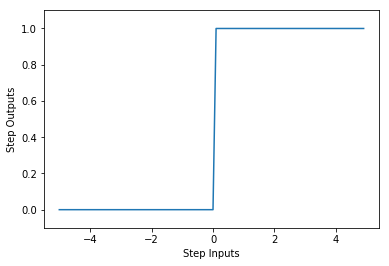

In [5]:
# 导入numpy科学运算库
import numpy as np              
# 导入matplotlib绘图库
import matplotlib.pylab as plt  

# 魔法指令，让matplotlib图形直接在jupyter notebook中显示
%matplotlib inline

# 以x数组（ [-5.0, -4.9, ……, 4.9] ）为参数 —— 在下面定义
# 对数组的各个元素执行阶跃函数运算，并以数组形式返回运算结果
def step_function(x):
    # 通过dtpye将返回结果的数据类型从布尔型转换为 int型，
    # 即：Trur/False转换为1/0，形成新的数组
    return np.array(x > 0, dtype=np.int) 

# 在−5.0到5.0的范围内，以0.1为单位，生成NumPy数组（ [-5.0, -4.9, ……, 4.9] ）
x = np.arange(-5.0, 5.0, 0.1)     
y = step_function(x)

plt.plot(x, y)
# 指定y轴的范围
# 由于y为step_function(x)函数的返回数组，只有1/0
# 因此只需要限定在-0.1～1.1范围内即可
plt.ylim(-0.1, 1.1)               
                                  
                                  
# 显示图形
plt.xlabel("Step Inputs")
plt.ylabel("Step Outputs")
plt.show()

上图中，阶跃函数以 `0` 为界，输出从 `0` 切换为 `1`（或从 `1` 切换 `0`）。其值呈阶梯式变化，所以称之为 **阶跃函数**。

### 实验小结

在本实验中，你通过 **阶跃函数** 作为 **激活函数** ，并通过设置不同的权重、偏置参数的值，实现了简单的感知机逻辑运算：**与门、与非门、或门**。另外，你还会通过多个感知机的叠加，通过多层感知机解决单个感知机无法区分的非线性分类问题：**异或门（XOR gate）**。通过本实验，你能了解到：

- 感知机是具有输入和输出的算法。给定一个输入后，将输出一个既定的值。
- 感知机将权重和偏置设定为参数。
- 使用感知机可以表示与门和或门等逻辑电路。
- 异或门无法通过单层感知机来表示。
- 使用2层感知机可以表示异或门。
- 单层感知机只能表示线性空间，而多层感知机可以表示非线性空间